<a href="https://colab.research.google.com/github/YiDong7120/Natural-Language-Processing-NLP-/blob/main/imdb_movie_review_eda_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# 0. Install all the required packages
!apt install tesseract-ocr
!apt-get install poppler-utils
!pip install pytesseract
!pip install pillow==9.0.0
!pip install opencv-python
!pip install pdf2image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
^C
Reading package lists... Done
^C
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import ConfigOptionParser
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/parser.py"

In [1]:
# 1. Import all the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import textblob
import sklearn
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [68]:
# 2. Generate the dataset
from zipfile import ZipFile
#zip = ZipFile("archive.zip")
##zip.extractall()
#df=pd.read_csv("IMDB Dataset.csv")
#df.head(10)
df=pd.read_csv("https://raw.githubusercontent.com/YiDong7120/Natural-Language-Processing-NLP-/main/IMDB%20Dataset.csv")
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# 3. Example of property object review in first row
df.iloc[0].review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [4]:
# 4. Summary of the datasets.
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
# 5. Total columns and rows
df.shape

(50000, 2)

In [6]:
# 6. Sentiment counts of positive and negative values.
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [67]:
# 7. Return the first 5 rows
df.head()

,review,sentiment
0,one of the other review ha mention that after ...,1
1,a wonder littl product the film techniqu is ve...,1
2,i thought thi wa a wonder way to spend time on...,1
3,basic there a famili where a littl boy jake th...,0
4,petter mattei love in the time of money is a v...,1


In [8]:
# 8. Check and detect null values
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [9]:
# 9. Convert string to lowercase
df.review=df.review.str.lower()
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [10]:
# 10. Remove and replace html tags
df.review=df.review.str.replace('<[^<]+?>','')
df.head()

<ipython-input-10-a775bf39eb23>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.review=df.review.str.replace('<[^<]+?>','')


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [11]:
# 11. Remove and replace punctuations and special characters 
df["review"] = df['review'].str.replace('[^\w\s]','')
df.head()

<ipython-input-11-03e942f3e004>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["review"] = df['review'].str.replace('[^\w\s]','')


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [12]:
# 12. Function for removing URL
def remove_url(text):
    pattern=re.compile(r'https ? ://\s+|www\.\s+')
    return pattern.sub(r'',text)

In [13]:
# 13. Remove the URL
df['review']=df['review'].apply(remove_url)

In [14]:
# 14. Shortcut words
chatword={'AFAIK':'As Far As I Know',
'AFK':'Away From Keyboard',
'ASAP':'As Soon As Possible',
'ATK':'At The Keyboard',
'ATM':'At The Moment',
'A3':'Anytime, Anywhere, Anyplace',
'BAK':'Back At Keyboard',
'BBL':'Be Back Later',
'BBS':'Be Back Soon',
'BFN':'Bye For Now',
'B4N':'Bye For Now',
'BRB':'Be Right Back',
'BRT':'Be Right There',
'BTW':'By The Way',
'B4':'Before',
'B4N':'Bye For Now',
'CU':'See You',
'CUL8R':'See You Later',
'CYA':'See You',
'FAQ':'Frequently Asked Questions',
'FC':'Fingers Crossed',
'FWIW':'For What Its Worth',
'FYI':'For Your Information',
'GAL':'Get A Life',
'GG':'Good Game',
'GN':'Good Night',
'GMTA':'Great Minds Think Alike',
'GR8':'Great!',
'G9':'Genius',
'IC':'I See',
'ICQ':'I Seek you (also a chat program)',
'ILU':'ILU: I Love You',
'IMHO':'In My Honest/Humble Opinion',
'IMO':'In My Opinion',
'IOW':'In Other Words',
'IRL':'In Real Life',
'KISS':'Keep It Simple, Stupid',
'LDR':'Long Distance Relationship',
'LMAO':'Laugh My A.. Off',
'LOL':'Laughing Out Loud',
'LTNS':'Long Time No See',
'L8R':'Later',
'MTE':'My Thoughts Exactly',
'M8':'Mate',
'NRN':'No Reply Necessary',
'OIC':'Oh I See',
'PITA':'Pain In The A..',
'PRT':'Party',
'PRW':'Parents Are Watching',
'QPSA':'Que Pasa?',
'ROFL':'Rolling On The Floor Laughing',
'ROFLOL':'Rolling On The Floor Laughing Out Loud',
'ROTFLMAO':'Rolling On The Floor Laughing My A.. Off',
'SK8':'Skate',
'STATS':'Your sex and age',
'ASL':'Age, Sex, Location',
'THX':'Thank You',
'TTFN':'Ta-Ta For Now!',
'TTYL':'Talk To You Later',
'U':'You',
'U2':'You Too',
'U4E':'Yours For Ever',
'WB':'Welcome Back',
'WTF':'What The F...',
'WTG':'Way To Go!',
'WUF':'Where Are You From?',
'W8':'Wait...'
}

In [15]:
# 15. Function for changing shortcut words to normal chat words
def chat_words(text):
    new_text=[]
    for w in text.split():
        if w.upper()in chatword:
            new_text.append(chatword[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [16]:
# 16. Expand shorcut words to chat words
df['review']=df['review'].apply(chat_words)

In [17]:
# 17. Convert strings in the shortcut word index to lowercase.
df.review=df.review.str.lower()
df.review=df.review.str.replace('<[^<]+?>','')
df["review"] = df['review'].str.replace('[^\w\s]','')

<ipython-input-17-4ef48180f45f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.review=df.review.str.replace('<[^<]+?>','')
<ipython-input-17-4ef48180f45f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["review"] = df['review'].str.replace('[^\w\s]','')


In [18]:
# 18. Return the first 5 rows
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [19]:
# 19. Example of property object review in first row
df.review[0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

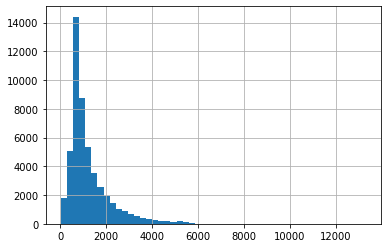

In [20]:
# 20. Analysis of number of characters in a review
df['review'].str.len().hist(bins=50)

In [21]:
# 21. Split the dataset
df1=df['review'].str.split()

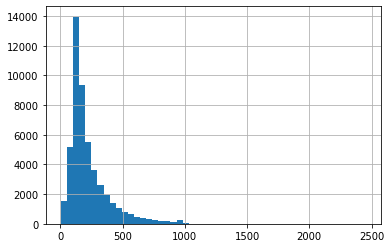

In [22]:
# 22. Analysis of number of words in a review
df1.str.len().hist(bins=50)

In [23]:
# 23. Return the first 5 rows of negative sentiment
df_negative=df[df.sentiment=='negative']
df_negative.head()

,review,sentiment
3,basically theres a family where a little boy j...,negative
7,this show was an amazing fresh innovative idea...,negative
8,encouraged by the positive comments about this...,negative
10,phil the alien is one of those quirky films wh...,negative
11,i saw this movie when i was about 12 when it c...,negative


In [24]:
# 24. Return the first 5 rows of positive sentiment
df_positive=df[df.sentiment=='positive']
df_positive.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
4,petter matteis love in the time of money is a ...,positive
5,probably my alltime favorite movie a story of ...,positive


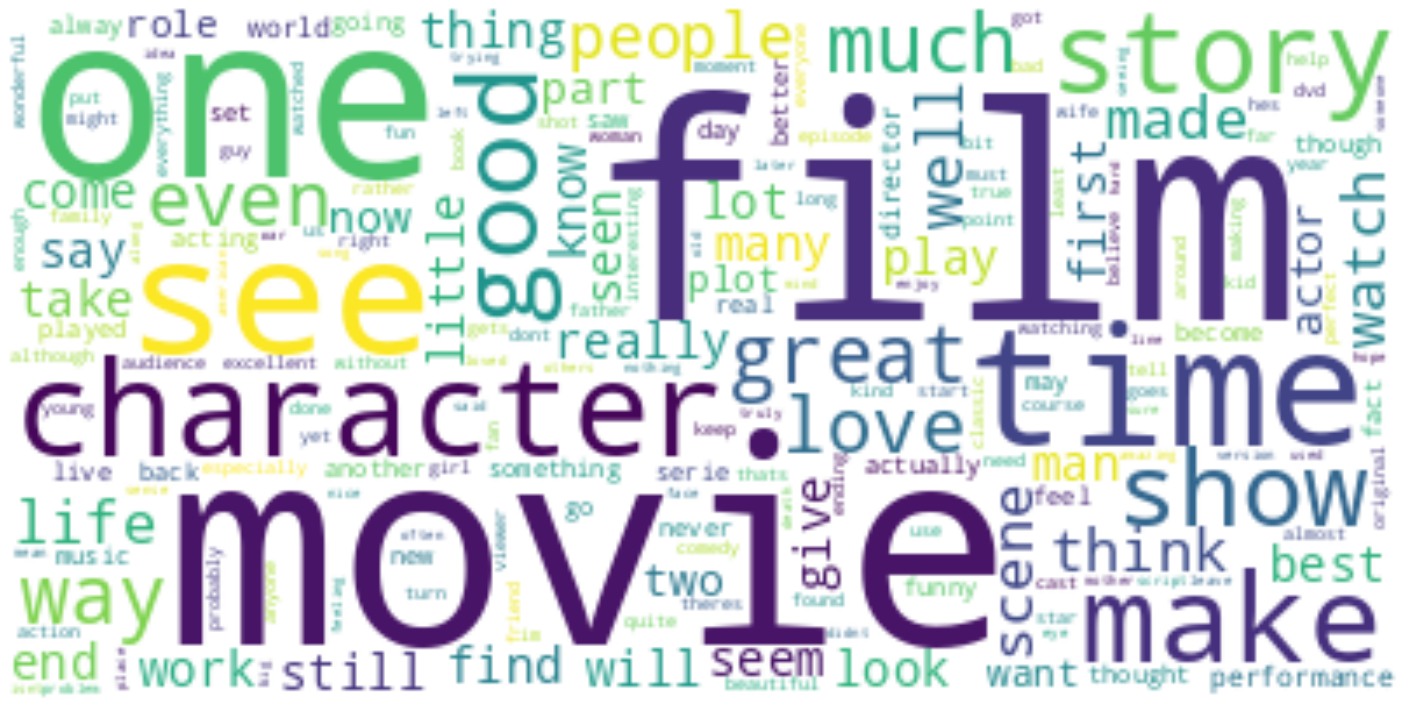

In [25]:
# 25. Visualisation of positive sentiments
text_positive= " ".join(i for i in df_positive.review)
stopwords = set(STOPWORDS)
wordcloud_positive = WordCloud(stopwords=stopwords, background_color="white").generate(text_positive)
plt.figure( figsize=(25,20))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

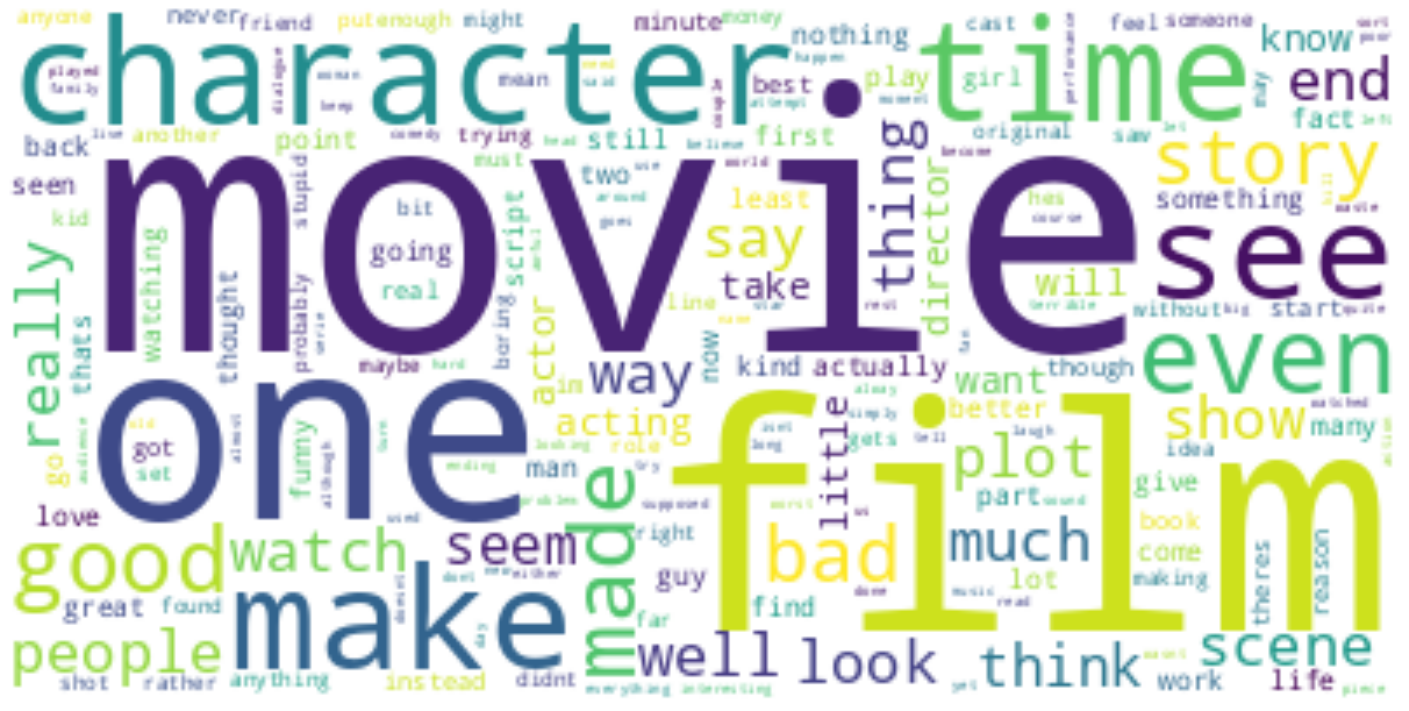

In [26]:
# 26. Visualisation of negative sentiments
text_negative= " ".join(i for i in df_negative.review)
stopwords = set(STOPWORDS)
wordcloud_negative = WordCloud(stopwords=stopwords, background_color="white").generate(text_negative)
plt.figure( figsize=(25,20))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
# 27. Function for stemming
ps=PorterStemmer()
def stem(text):
    L=[]
    for i in text.split():
        L.append(ps.stem(i))
        
        
    string=" ".join(L)    
    return string

In [28]:
# 28. Apply stemming
df.review=df.review.apply(stem)

In [29]:
# 29. Data wrangling/Data cleaning
df['sentiment']=df['sentiment'].apply(lambda x: 1 if x=='positive' else 0)

In [69]:
# 30. Return the first 5 rows
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [31]:
# 31. Use tf-idf approach to vectorize
tfd=TfidfVectorizer(ngram_range=(1,3),max_features=5000)

In [32]:
# 32. Feature extraction
vector=tfd.fit_transform(df.review)

In [33]:
# 33. Put in array
vector=vector.toarray()
vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
# 34. Total columns and rows
vector.shape

(50000, 5000)

In [35]:
# 35. Split the dataset into training and test dataset
X_train=vector[0:40000]
Y_train=df.sentiment[0:40000]
X_test=vector[40000:]
Y_test=df.sentiment[40000:]

In [36]:
# 36. Create a Logistic Regression object
model_lr=LogisticRegression()

In [37]:
# 37. Perform Logistic Regression
model_lr.fit(X_train,Y_train)

LogisticRegression()

In [38]:
# 38. View the accuracy
print("The accuracy of the model is: ", model_lr.score(X_test,Y_test)*100)

The accuracy of the model is:  88.7


In [39]:
# 39. Make prediction
predictions_lr=model_lr.predict(X_test)
print(classification_report(Y_test,predictions_lr))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4993
           1       0.89      0.89      0.89      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



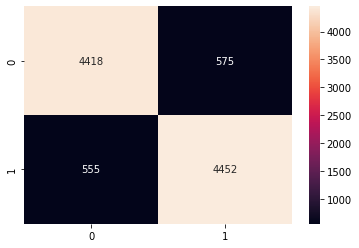

In [40]:
# 40. Display the confusion matrix
cm=confusion_matrix(Y_test,predictions_lr)
sns.heatmap(cm,annot=True,fmt='d')

In [53]:
# 41. Import all the required modules
import pickle
import cv2
import pytesseract
import numpy as np
from pdf2image import convert_from_path
import requests

In [42]:
# 42. Convert pdf based image to text
def image_based_pdf(file):
    # pdfFileObj = open(file,'rb') 
    # convert pdf into image
    pdf_images = convert_from_path(file)
    convert_rgb2bgr = lambda img_arr: img_arr[:, :, ::-1].copy()

    pages_df = ""
    for page, pil_img in enumerate(pdf_images):
        print(f"Page {page}")
        rgb_img = np.array(pil_img)
        bgr_img = convert_rgb2bgr(rgb_img)
        gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
        pages_df = pytesseract.image_to_string(gray_img)
        return pages_df

In [56]:
# 43. Funtion for file downloading
def download_file(url):
    local_filename = url.split('/')[-1]
    response = requests.get(url)
    open(local_filename, "wb").write(response.content)
    return local_filename

In [62]:
# 44. Download good review pdf
file_path = download_file("https://github.com/YiDong7120/Natural-Language-Processing-NLP-/raw/main/Good%20Review.pdf")
text_good = image_based_pdf(file_path)

Page 0


In [63]:
# 45. Download bad review pdf
file_path = download_file("https://github.com/YiDong7120/Natural-Language-Processing-NLP-/raw/main/Bad%20Review.pdf")
text_bad = image_based_pdf(file_path)

Page 0


In [64]:
# 46. Open file object file
pickle.dump(model_lr ,open('model_lr.pkl', 'wb'))
pickle.dump(tfd, open('tfd.pkl', 'wb'))

In [65]:
# 47. Read and return an object from the pickle data stored in a file
model = pickle.load(open('model_lr.pkl', 'rb'))
tfd = pickle.load(open('tfd.pkl', 'rb'))

In [70]:
# 48. Predict the sentiment type from complex image
model.predict(tfd.transform([text_bad, text_good]))

array([0, 1])